In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
import torch
import torchvision

The aim of this notebook is to recreate the pytorch_mnist notebook using only numpy

### Load data

I'll use torchvision to load the data just for convenience, all training will be done using only numpy

In [5]:
train_batch_size = 64
test_batch_size = 1000

In [6]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./datasets', train=True, download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(0, 1)
                              ])),
    batch_size=train_batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./datasets', train=False, download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(0, 1)
                              ])),
    batch_size=test_batch_size, shuffle=True
)

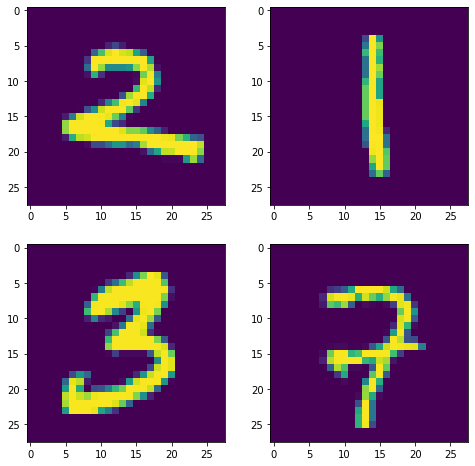

In [12]:
# visualize some images
train_iter = iter(train_loader)
images, labels = train_iter.next()
plt.figure(figsize=(8,8))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    ax.imshow(images[i].reshape(28, 28))

### Build simple neural network using numpy

In [21]:
def initialize_weights():
    return np.random.randn(784, 200), np.random.randn(200, 10)

In [29]:
def relu(x):
    return max(0, x)

In [64]:
def softmax(outputs, labels):
    return np.exp(outputs[range(outputs.shape[0]), labels]) / np.sum(np.exp(x), axis=1)

In [65]:
def dx_cross_entropy_loss(outputs, labels):
    return (1/outputs.shape[0]) * (-1 + softmax(outputs, labels))

In [66]:
def cross_entropy_loss(outputs, labels):
    return np.mean(-np.log((np.exp(outputs[range(outputs.shape[0]), labels])) / np.sum(np.exp(outputs), axis=1)))

In [28]:
def forward(images, w1, w2):
    f1 = relu(images.dot(w1))
    f2 = f1.dot(w2)
    return f2

outputs = forward(images, w1, w2)
loss = cross_entropy_loss(outputs, labels)
compute backward gradients for loss dx_loss -> dx_f2 -> dx_relu -> dx_f1
update weights